# **(EDA)**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\ngubo\\Documents\\vscode-projects\\US_Air_Pollution_Team_2\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\ngubo\\Documents\\vscode-projects\\US_Air_Pollution_Team_2'

Importing relevant libraries and New CSV file containing population and weather

In [4]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import sklearn as skl

df = pd.read_csv('Dataset//EDA/pollution_us_2012_2016-population-weather.csv')

In [5]:
df.head() # Displaying the first 5 rows of the dataframe

,Address,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,...,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,Population,Latitude,Longitude,tmax,prcp,wspd
0,400 W RIVER ROAD,Arizona,Pima,Tucson,2012-01-01,17.716667,31.0,0,29,0.013667,...,0.336842,0.6,5,7.0,"542,649",31.9681,-111.7806,26.7,0.0,17.6
1,400 W RIVER ROAD,Arizona,Pima,Tucson,2012-01-02,15.062500,30.6,18,28,0.015083,...,0.225000,0.4,23,5.0,"542,649",31.9681,-111.7806,24.4,0.0,27.4
2,400 W RIVER ROAD,Arizona,Pima,Tucson,2012-01-03,21.643478,31.0,18,29,0.011417,...,0.295833,0.4,0,5.0,"542,649",31.9681,-111.7806,26.1,0.0,10.8
3,400 W RIVER ROAD,Arizona,Pima,Tucson,2012-01-04,25.041668,37.8,10,35,0.009208,...,0.345833,0.5,12,6.0,"542,649",31.9681,-111.7806,24.4,0.0,9.0
4,400 W RIVER ROAD,Arizona,Pima,Tucson,2012-01-05,21.981817,37.1,17,35,0.013042,...,0.291667,0.6,23,7.0,"542,649",31.9681,-111.7806,23.9,0.0,9.7


In [6]:
df.info() # Getting information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58158 entries, 0 to 58157
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Address            58158 non-null  object 
 1   State              58158 non-null  object 
 2   County             58158 non-null  object 
 3   City               58158 non-null  object 
 4   Date Local         58158 non-null  object 
 5   NO2 Mean           58158 non-null  float64
 6   NO2 1st Max Value  58158 non-null  float64
 7   NO2 1st Max Hour   58158 non-null  int64  
 8   NO2 AQI            58158 non-null  int64  
 9   O3 Mean            58158 non-null  float64
 10  O3 1st Max Value   58158 non-null  float64
 11  O3 1st Max Hour    58158 non-null  int64  
 12  O3 AQI             58158 non-null  int64  
 13  SO2 Mean           58158 non-null  float64
 14  SO2 1st Max Value  58158 non-null  float64
 15  SO2 1st Max Hour   58158 non-null  int64  
 16  SO2 AQI            581

In [7]:
df.isnull().sum() # Checking for missing values in the dataframe

Address              0
State                0
County               0
City                 0
Date Local           0
NO2 Mean             0
NO2 1st Max Value    0
NO2 1st Max Hour     0
NO2 AQI              0
O3 Mean              0
O3 1st Max Value     0
O3 1st Max Hour      0
O3 AQI               0
SO2 Mean             0
SO2 1st Max Value    0
SO2 1st Max Hour     0
SO2 AQI              0
CO Mean              0
CO 1st Max Value     0
CO 1st Max Hour      0
CO AQI               0
Population           0
Latitude             0
Longitude            0
tmax                 0
prcp                 0
wspd                 0
dtype: int64

From the Info the Column 'Population' is currently a string with commas and must be converted to integers to run the Hypothesis: Higher population areas have worse air quality	

In [8]:
# Remove commas and convert to integer
df['Population'] = df['Population'].str.replace(',', '').astype(int)

In [15]:
# AQI pollutants list
aqi_pollutants = ['NO2 AQI', 'SO2 AQI', 'O3 AQI', 'CO AQI']

# Create a copy for correlation analysis   
df_aqi = df[['Population'] + aqi_pollutants]

# Pearson correlation for each AQI pollutant vs Population
import scipy.stats as stats

for pollutant in aqi_pollutants:
    r, p = stats.pearsonr(df_aqi['Population'], df_aqi[pollutant])
    print(f"{pollutant}: r = {r:.3f}, p = {p:.4f}")

NO2 AQI: r = 0.176, p = 0.0000
SO2 AQI: r = 0.027, p = 0.0000
O3 AQI: r = -0.056, p = 0.0000
CO AQI: r = -0.021, p = 0.0000


# Summary of Hypothesis Test

1. NO₂ AQI
- r = 0.176, p = 0.0000
- Interpretation:
  - Weak positive correlation between population and NO₂ AQI.
  - As population increases, NO₂ levels tend to increase slightly.
  - Statistically significant due to very low p-value (p < 0.001), but the correlation is weak in strength.
- Supports your hypothesis? – Yes, weakly.

2. SO₂ AQI
- r = 0.027, p = 0.0000
- Interpretation:
  - Very weak positive correlation.
  - While statistically significant, the effect is negligible in practice.
- Supports your hypothesis? – Technically yes (statistically), but not meaningfully.

3. O₃ AQI
- r = -0.056, p = 0.0000
- Interpretation:
  - Very weak negative correlation: O₃ AQI slightly decreases as population increases.
  - Statistically significant due to large sample size, but practically very small.
- Supports your hypothesis? – No, slight evidence of the opposite trend.

4. CO AQI
- r = -0.021, p = 0.0000
- Interpretation:
  - Essentially no correlation.
  - Statistically significant (because of large data size), but no practical effect.
- Supports your hypothesis? – No

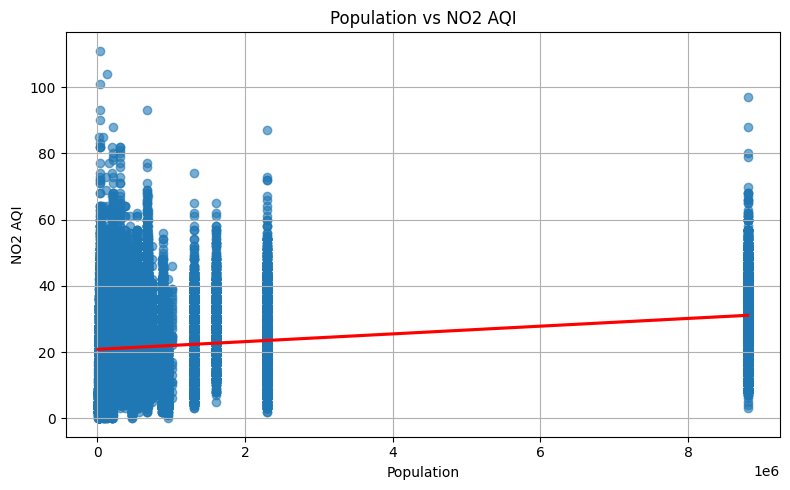

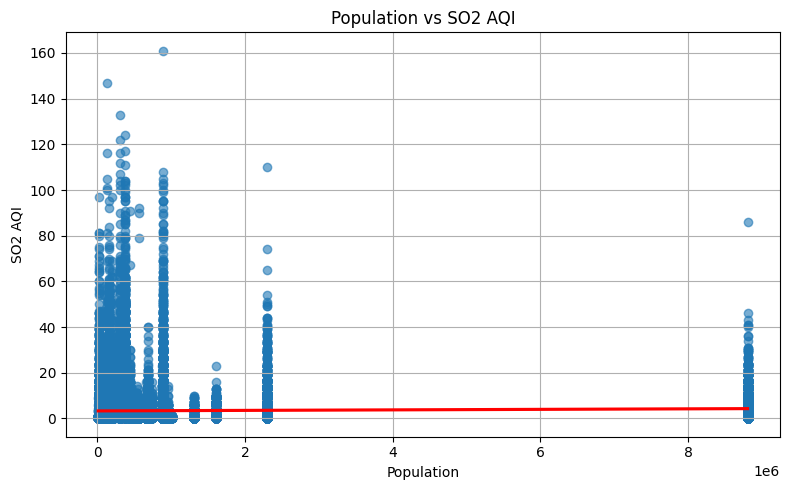

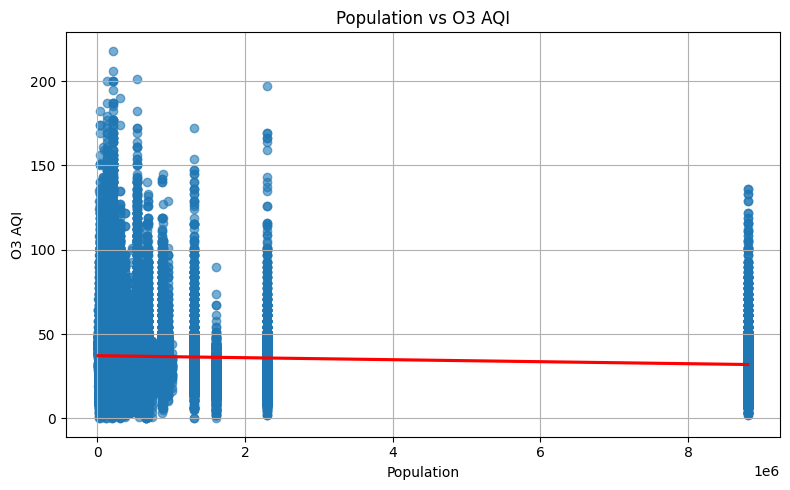

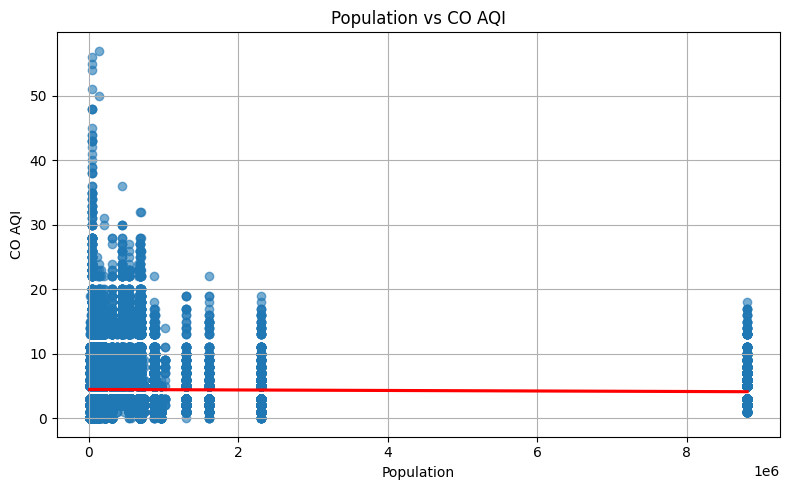

In [11]:
for pollutant in aqi_pollutants:
    plt.figure(figsize=(8, 5))
    sns.regplot(
        x='Population', y=pollutant,
        data=df_aqi,
        scatter_kws={'alpha': 0.6},
        line_kws={'color': 'red'}
    )
    plt.title(f'Population vs {pollutant}')
    plt.xlabel('Population')
    plt.ylabel(pollutant)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Graph 1 – Population vs NO₂ AQI

A moderate upward trend (positive correlation).

As population increases, NO₂ AQI also tends to increase noticeably.

# Graph 2 – Population vs SO₂ AQI

Almost no clear trend, and the red regression line is nearly flat.

No meaningful relationship between population and SO₂ AQI.

# Graph 3 – Population vs O₃ AQI

A slight negative trend — O₃ AQI decreases slightly as population increases.

However, this trend is very weak and not statistically significant.

# Graph 4 – Population vs CO AQI

No clear trend at all.

The regression line is flat, indicating no relationship between population and CO AQI.


# Log transforming the Population Column to reduce Skewness and better model relationships

In [ ]:
# Log-transform Population to reduce skewness
df_aqi.loc[:, 'log_Population'] = np.log(df_aqi['Population'] + 1)

In [24]:
# Recalculate correlations with log-transformed population
aqi_pollutants = ['NO2 AQI', 'SO2 AQI', 'O3 AQI', 'CO AQI']

for pollutant in aqi_pollutants:
    r, p = stats.pearsonr(df_aqi['log_Population'], df_aqi[pollutant])
    print(f"{pollutant}: r = {r:.3f}, p = {p:.4f}")

NO2 AQI: r = 0.233, p = 0.0000
SO2 AQI: r = 0.021, p = 0.0000
O3 AQI: r = -0.022, p = 0.0000
CO AQI: r = -0.031, p = 0.0000


Plot Population Bins

In [26]:
# Define bins for rural, suburban, urban
bins = [0, 50000, 500000, df_aqi['Population'].max()]
labels = ['Rural', 'Suburban', 'Urban']

df_aqi.loc[:, 'Population_Bin'] = pd.cut(df_aqi['Population'], bins=bins, labels=labels)

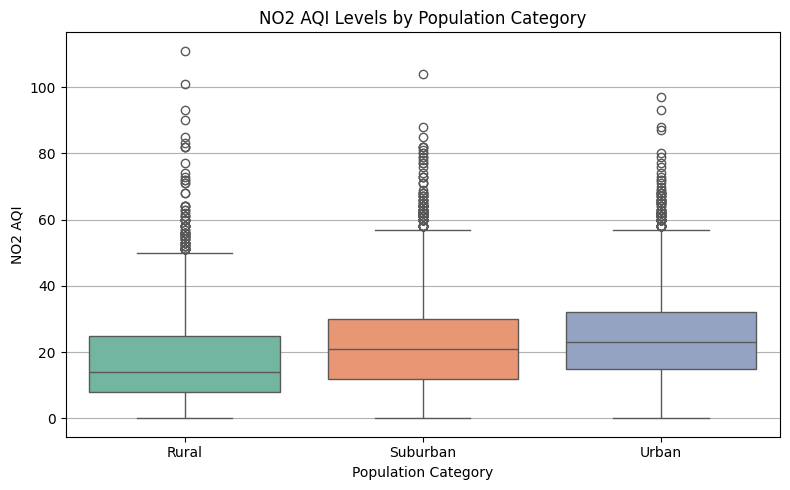

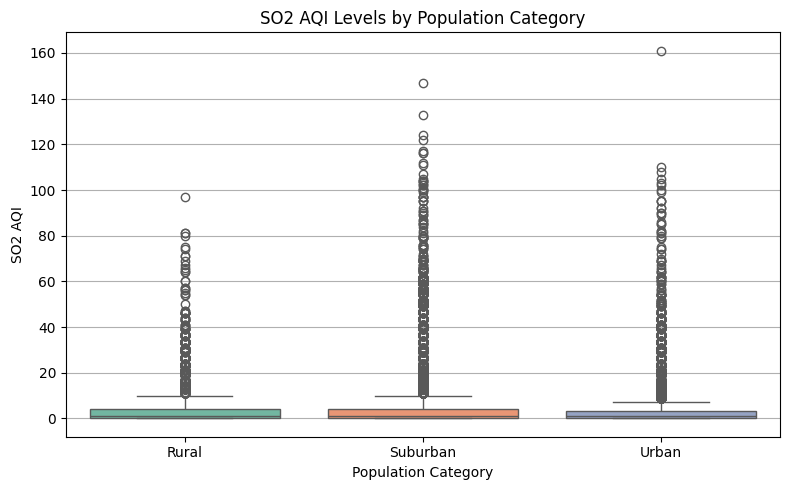

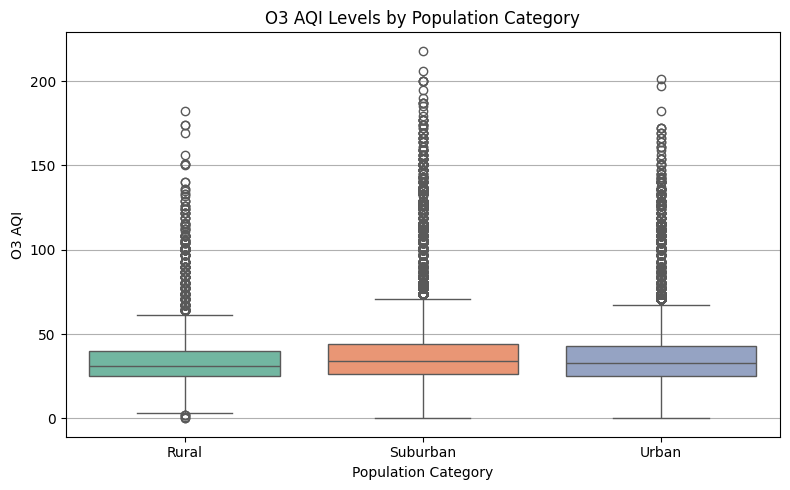

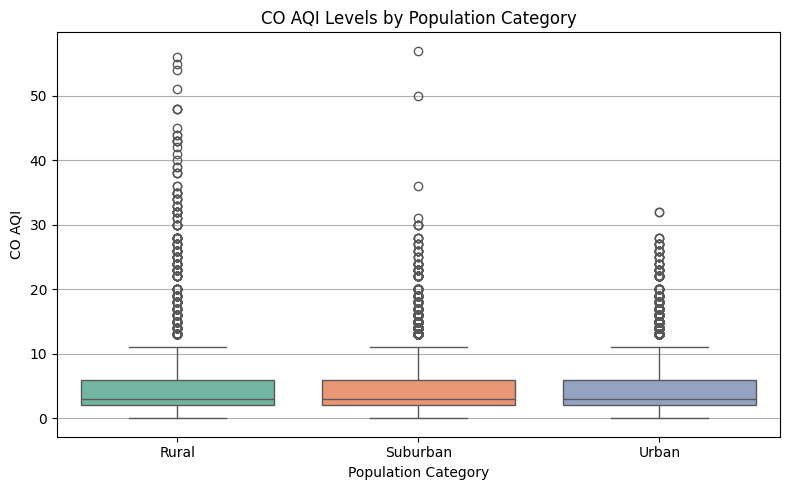

In [27]:
# Plot boxplots for each pollutant by population bin with enhanced styling
for pollutant in aqi_pollutants:
    plt.figure(figsize=(8,5))
    ax = sns.boxplot(
        x='Population_Bin',
        y=pollutant,
        hue='Population_Bin',
        data=df_aqi,
        palette='Set2',
        dodge=False
    )
    plt.title(f'{pollutant} Levels by Population Category')
    plt.xlabel('Population Category')
    plt.ylabel(pollutant)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Box Plots

NO₂ AQI
- Trend: Median and overall distribution of NO₂ AQI increases from Rural → Suburban → Urban.

- Interpretation: Urban areas tend to have higher NO₂ pollution, likely due to more traffic, industrial activity, and dense infrastructure.

- Spread & Outliers: Although urban areas show more consistently higher values, the highest individual outlier actually appears in a rural area.
- This suggests that some rural locations may experience extreme NO₂ events, possibly due to local industrial sites, burning, or data irregularities — even if such events are rare.

SO₂ AQI
- Trend: Suburban and urban areas show slightly higher median SO₂ AQI compared to rural areas.

- Interpretation: This could suggest that SO₂ pollution sources — such as power plants, industrial facilities, or shipping routes — may be more concentrated near suburban and urban zones.

- Spread & Outliers: The highest SO₂ AQI outlier is found in an urban area, showing that although the medians are similar, some urban locations experience extreme SO₂ levels — possibly due to local industrial activity or isolated events.

O₃ AQI
- Trend: Medians for suburban and urban areas are quite close, with rural areas slightly lower on average.

- Interpretation: This suggests that ozone pollution doesn't vary much by population size in your data. Since ozone is a secondary pollutant (formed by chemical reactions in the atmosphere), it's often influenced more by regional weather patterns and sunlight than just local emissions.

- Spread & Outliers: Suburban areas show the highest outlier, indicating that ozone spikes can occur outside of major urban centers, possibly due to specific environmental or traffic conditions.

CO AQI
- Trend: Medians and overall distributions are similar across Rural and Suburban areas, with Urban showing a slightly tighter spread.

- Interpretation: Carbon monoxide levels appear to be relatively stable across population categories, suggesting widespread sources like vehicle emissions and residential heating that don’t scale dramatically with population.

- Spread & Outliers: Suburban areas have the single highest outlier in CO AQI. However, Rural areas show more frequent high outliers, suggesting occasional spikes, possibly from localized sources like wildfires, agricultural burning, or small industrial operations.

# Explaining ANOVA test

PR(>F) is the p-value. If it's below 0.05, there's a statistically significant difference in AQI between population categories (Rural, Suburban, Urban).

The higher the F-value, the stronger the evidence that the group means differ.

In [30]:
# Create a copy to keep original safe
city_summary_aqi_clean = df_aqi.copy()

# Replace spaces with underscores in columns
city_summary_aqi_clean.columns = [col.replace(' ', '_') for col in city_summary_aqi_clean.columns]

# Update pollutant list accordingly
aqi_pollutants_clean = [p.replace(' ', '_') for p in aqi_pollutants]

# Import statsmodels for ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Run ANOVA with clean column names
for pollutant in aqi_pollutants_clean:
    print(f"\nANOVA results for {pollutant}:")
    model = ols(f'{pollutant} ~ C(Population_Bin)', data=city_summary_aqi_clean).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(anova_table)


ANOVA results for NO2_AQI:
                         sum_sq       df            F  PR(>F)
C(Population_Bin)  3.125792e+05      2.0  1140.791785     0.0
Residual           7.967293e+06  58155.0          NaN     NaN

ANOVA results for SO2_AQI:
                         sum_sq       df           F         PR(>F)
C(Population_Bin)  2.817756e+04      2.0  252.531316  6.317501e-110
Residual           3.244481e+06  58155.0         NaN            NaN

ANOVA results for O3_AQI:
                         sum_sq       df           F        PR(>F)
C(Population_Bin)  8.034829e+04      2.0  111.991107  2.859581e-49
Residual           2.086172e+07  58155.0         NaN           NaN

ANOVA results for CO_AQI:
                          sum_sq       df          F        PR(>F)
C(Population_Bin)    1694.763101      2.0  70.524983  2.561373e-31
Residual           698752.019663  58155.0        NaN           NaN


1. NO₂ AQI
- F = 1140.79, p < 0.001
- Interpretation:
  - There's a very strong difference in NO₂ AQI across population categories.
  - Likely, urban areas have much higher NO₂ levels (as you saw in the box plots), but with some notable outliers — like a high-rural NO₂ value.
- Statistically significant? Yes — extremely.

2. SO₂ AQI
- F = 252.53, p < 0.001
- Interpretation:
  - There is a strong difference in SO₂ AQI by population group.
  - Box plots showed higher values in suburban and urban, with urban having the highest outlier.
- Statistically significant? Yes.

3. O₃ AQI
- F = 111.99, p < 0.001
- Interpretation:
  - Moderate differences in ozone AQI between groups.
  - Suburban and urban were close, but suburban had the highest outlier.
- Statistically significant? Yes, though less strong than NO₂ or SO₂.

4. CO AQI
- F = 70.52, p < 0.001
- Interpretation:
  - Smaller differences, but still statistically significant.
  - Suburban had the highest single outlier, but rural had more frequent outliers.
- Statistically significant? Yes.

# After creating a Boxplot and running an ANOVA test i was stuck and asked ChatGPT what the next logical step to take and it offered a Tukey's HSD (Honestly Significant Difference), what this function does from my understanding is it compares all groups of means to find which specific groups differ significantly from each others - ANOVA tells you that at least one group mean is different but doesn't specify which group but what Tukey's HSD does is pinpoint those pairs for a more accurate reading   

In [32]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

aqi_pollutants = ['NO2 AQI', 'SO2 AQI', 'O3 AQI', 'CO AQI']

for pollutant in aqi_pollutants:
    print(f"\nTukey's HSD for {pollutant}:")
    tukey = pairwise_tukeyhsd(
        endog=df_aqi[pollutant],           # AQI values
        groups=df_aqi['Population_Bin'],   # Population categories (rural, suburban, urban)
        alpha=0.05
    )
    print(tukey.summary())


Tukey's HSD for NO2 AQI:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1   group2  meandiff p-adj lower  upper  reject
-----------------------------------------------------
   Rural Suburban   5.0608   0.0 4.7288 5.3927   True
   Rural    Urban    6.897   0.0 6.5584 7.2356   True
Suburban    Urban   1.8362   0.0 1.5875 2.0849   True
-----------------------------------------------------

Tukey's HSD for SO2 AQI:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj  lower   upper  reject
-------------------------------------------------------
   Rural Suburban    0.953   0.0  0.7412  1.1648   True
   Rural    Urban  -0.5553   0.0 -0.7714 -0.3392   True
Suburban    Urban  -1.5083   0.0  -1.667 -1.3496   True
-------------------------------------------------------

Tukey's HSD for O3 AQI:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj  lower   upper  reject
-----------------------------------------

NO₂ AQI:
- All pairs (Rural-Suburban, Rural-Urban, Suburban-Urban) have significant differences (p-adj = 0.0 and reject=True).
- Mean differences:
  - Suburban is ~5.06 units higher than Rural
  - Urban is ~6.90 units higher than Rural
  - Urban is ~1.84 units higher than Suburban
- Interpretation:
  - NO₂ pollution levels increase significantly as you go from Rural → Suburban → Urban areas.

SO₂ AQI:
- All pairs show significant differences.
- Mean differences:
  - Suburban is ~0.95 higher than Rural
  - Urban is ~0.56 lower than Rural
  - Urban is ~1.51 lower than Suburban
- Interpretation:
  - SO₂ levels differ between all categories, but interestingly Urban areas have lower SO₂ than Suburban and Rural, with Suburban being the highest.

O₃ AQI:
- All pairs have significant differences.
- Mean differences:
  - Suburban ~3.38 higher than Rural
  - Urban ~2.08 higher than Rural
  - Urban ~1.30 lower than Suburban
- Interpretation:
  - O₃ levels are higher in Suburban and Urban than Rural, but Urban is lower than Suburban, suggesting a peak in Suburban areas.

CO AQI:
- Again, all pairs significant.
- Mean differences:
  - Suburban ~0.32 lower than Rural
  - Urban ~0.51 lower than Rural
  - Urban ~0.18 lower than Suburban
- Interpretation:
  - CO pollution decreases from Rural → Suburban → Urban, the opposite trend compared to NO₂.

# Summary

The ANOVA tests confirm that population categories have statistically significant effects on the mean AQI values for all four pollutants. The Tukey HSD post-hoc tests clarify which pairs of population categories differ. Together with the box plots, these results strongly support the hypothesis that air pollution levels vary by population density — particularly for NO₂ — while relationships for SO₂, O₃, and CO are more complex and may involve other factors.

# Section 1

Section 1 content

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---